In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("/content/onlinefoods (1).csv")

In [ ]:
print("First rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Posi

In [ ]:
df['Monthly Income'].replace('No Income', np.nan, inplace=True)
df['Monthly Income'].fillna(0, inplace=True)

In [ ]:
income_mapping = {
    'Below Rs.10000': 5000,
    '10001 to 25000': 17500,
    '25001 to 50000': 37500,
    'More than 50000': 60000,
    '25001 to 50000': 37500
}
df['Monthly Income'] = df['Monthly Income'].replace(income_mapping).astype(float)

In [ ]:
categorical_features = ['Gender', 'Marital Status', 'Occupation']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_features)
    ])
X = df.drop(['Feedback', 'Output', 'Unnamed: 12'], axis=1)
y = df['Feedback']
X = preprocessor.fit_transform(X)

In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Age  Monthly Income  Family size    latitude   longitude  \
count  388.000000      388.000000   388.000000  388.000000  388.000000   
mean    24.628866    18608.247423     3.280928   12.972058   77.600160   
std      2.975593    22749.390406     1.351025    0.044489    0.051354   
min     18.000000        0.000000     1.000000   12.865200   77.484200   
25%     23.000000        0.000000     2.000000   12.936900   77.565275   
50%     24.000000     5000.000000     3.000000   12.977000   77.592100   
75%     26.000000    37500.000000     4.000000   12.997025   77.630900   
max     33.000000    60000.000000     6.000000   13.102000   77.758200   

            Pin code  
count     388.000000  
mean   560040.113402  
std        31.399609  
min    560001.000000  
25%    560010.750000  
50%    560033.500000  
75%    560068.000000  
max    560109.000000  


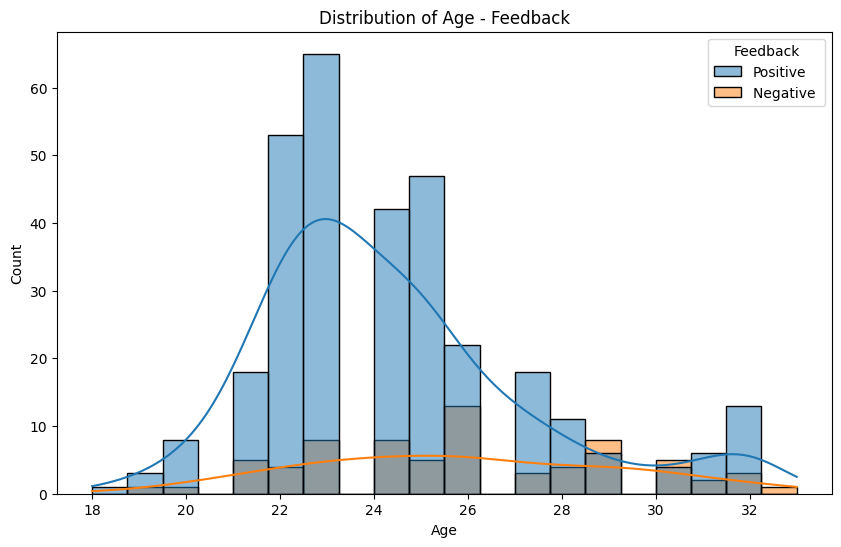

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', bins=20, kde=True, alpha=0.5)
plt.title('Distribution of Age - Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

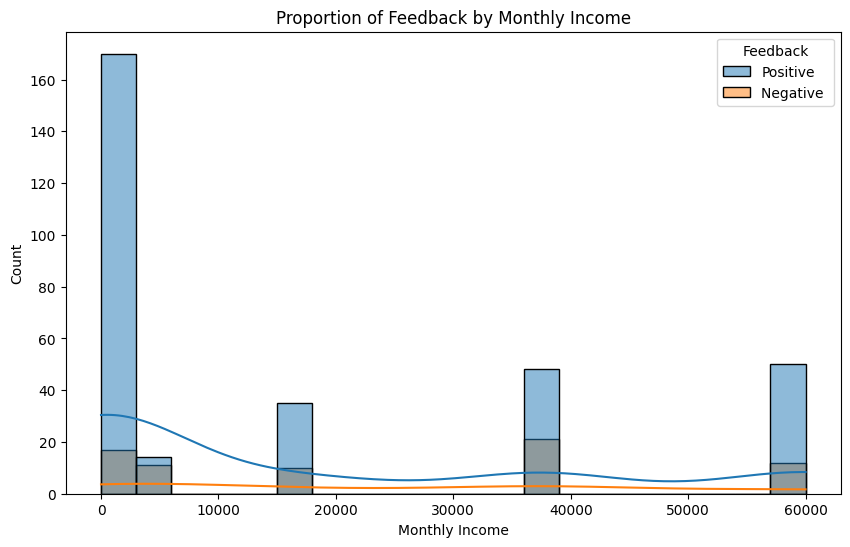

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly Income', hue='Feedback', bins=20, kde=True, alpha=0.5)
plt.title('Proportion of Feedback by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

<ipython-input-109-3a07e0445688>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


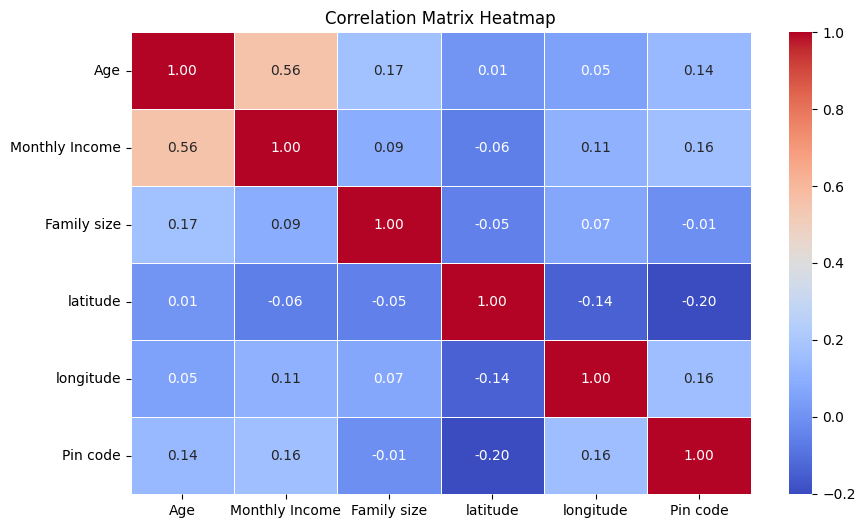

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

data split

In [ ]:
#X = df_encoded[selected_features]
#y = df_encoded['Feedback']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)


Model Evaluation:
Accuracy: 0.8205128205128205
Precision: 0.8533333333333334
Recall: 0.9552238805970149
Confusion Matrix:
[[ 0 11]
 [ 3 64]]


In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
encoded_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numerical_features + list(encoded_features)

In [ ]:
feature_importance = model.coef_[0]

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': feature_importance})

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

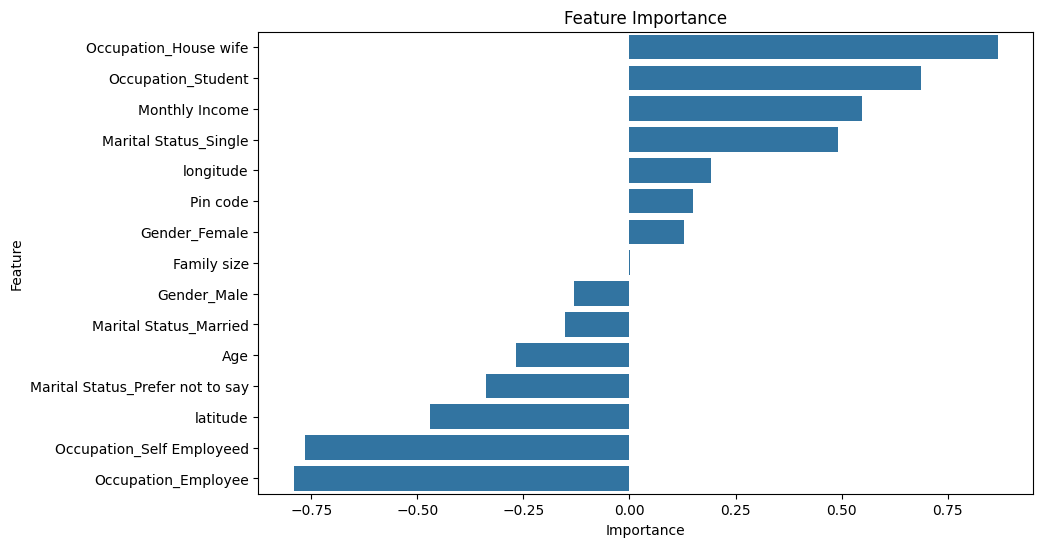

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

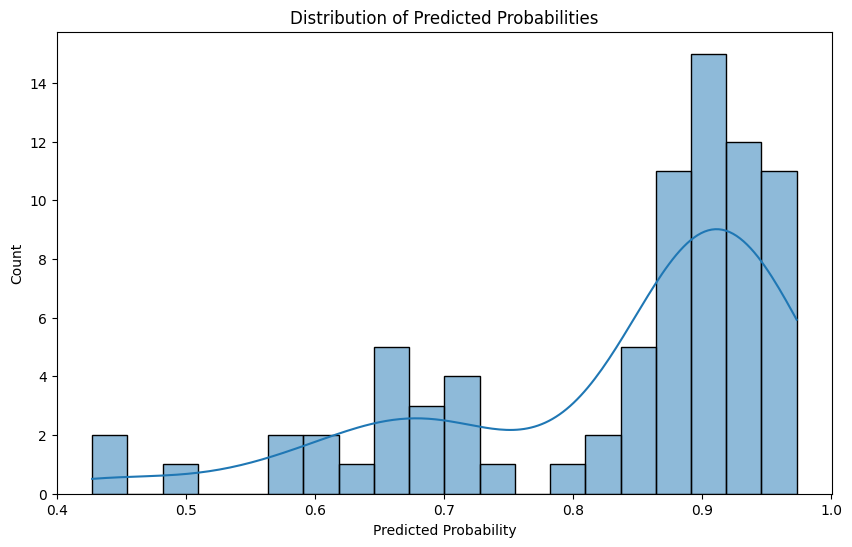

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.show()